In [1]:
# load Iris dataset
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [2]:
# split data to training and cv datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [3]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
# teaching a perceptron
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [5]:
# try to predict data
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_test_std)
print('Accuracy of perceptron: %.2f' % accuracy_score(y_test, y_pred))

Accuracy of perceptron: 0.91


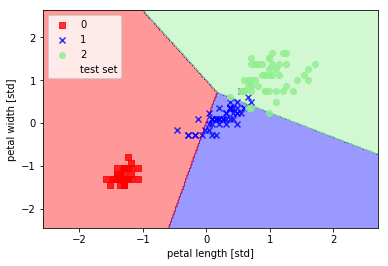

In [6]:
# plot decision boundaries
import matplotlib.pyplot as plt
from plot_decision_regions import plot_decision_regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = ppn, test_idx = range(105, 150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

In [7]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000.0, random_state = 0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Accuracy of logistic regression: %.2f' % accuracy_score(y_test, y_pred))

Accuracy of logistic regression: 0.98


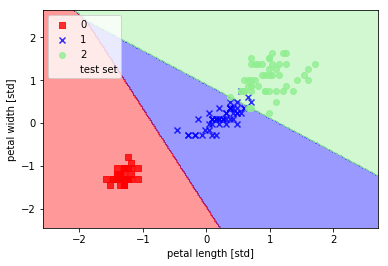

In [8]:
# plot results of logistic regression
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = lr, test_idx = range(105, 150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()